In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [155]:
df = pd.read_csv("/dataset/pokemon.csv")
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [156]:
print(sum(df["is_legendary"]==1))
print(sum(df["is_legendary"]==0))

70
731


In [157]:
    percent_missing = df.isnull().sum()*100/len(df)
    missing_value_df = pd.DataFrame({'percent_missing':percent_missing})
    
    missing_value_df

,percent_missing
abilities,0.000000
against_bug,0.000000
against_dark,0.000000
against_dragon,0.000000
against_electric,0.000000
against_fairy,0.000000
against_fight,0.000000
against_fire,0.000000
against_flying,0.000000
against_ghost,0.000000


In [158]:
mean_value=df['height_m'].mean()
df['height_m']=df['height_m'].fillna(mean_value)
mean_value=df['percentage_male'].mean()
df['percentage_male']=df['percentage_male'].fillna(mean_value)
df['type2']=df['type2'].fillna("No")
mean_value=df['weight_kg'].mean()
df['weight_kg']=df['weight_kg'].fillna(mean_value)

In [159]:
#df.head()

In [160]:
from ast import literal_eval
#print(len(literal_eval(df["abilities"][800])))

In [161]:
max_len = 0
j=0
for i in df["abilities"]:
    if max_len<len(literal_eval(df["abilities"][j])):
        max_len = len(literal_eval(df["abilities"][j]))
    df["abilities"][j] = literal_eval(df["abilities"][j])
    j=j+1
print(max_len)

6


In [162]:
df = df.join(pd.DataFrame(df.abilities.values.tolist()).add_prefix('abilities_'))
df.head()
print(df["abilities_1"][14])

Sniper


In [163]:
df['abilities_1']=df['abilities_1'].fillna("No")
df['abilities_2']=df['abilities_2'].fillna("No")
df['abilities_3']=df['abilities_3'].fillna("No")
df['abilities_4']=df['abilities_4'].fillna("No")
df['abilities_5']=df['abilities_5'].fillna("No")

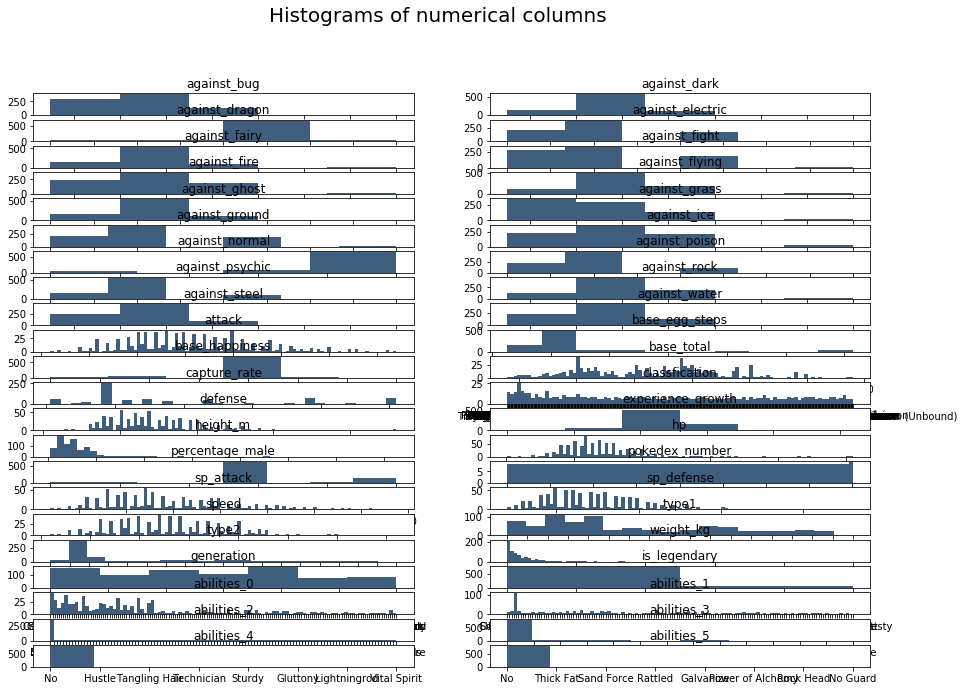

In [164]:
df2 = df.drop(columns = ['abilities','japanese_name','name'])
fig = plt.figure(figsize=(15,12))
plt.suptitle("Histograms of numerical columns",fontsize=20)
for i in range(df2.shape[1]):
    plt.subplot(25,2,i+1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])
    vals = np.size(df2.iloc[:,i].unique())
    if vals>=100:
        vals=100
    plt.hist(df2.iloc[:,i],bins=vals, color="#3F5D7D")
plt.tight_layout(rect=[0,0.3,1,0.95])

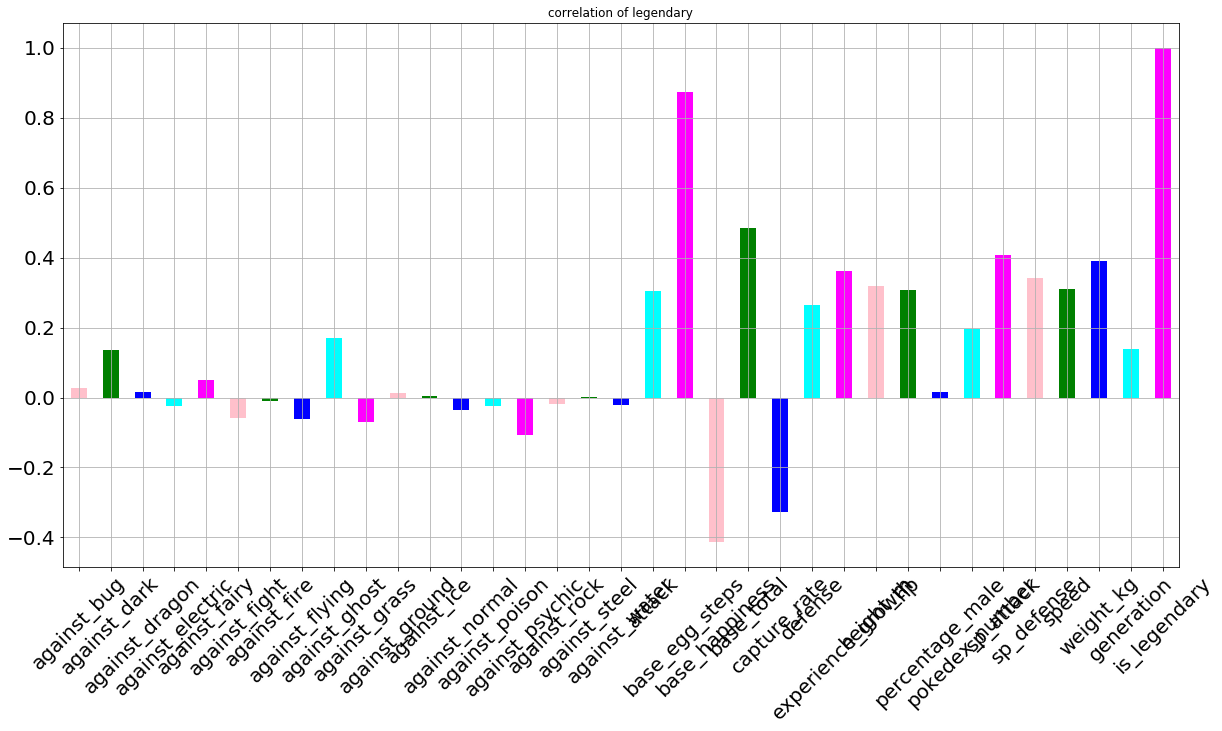

In [165]:
df2.corrwith(df.is_legendary).plot.bar(figsize=(20,10),title="correlation of legendary",fontsize=20,rot=45,grid=True,color=['pink','green','blue','cyan','magenta'])

In [166]:
data = df2
dummy =  pd.get_dummies(data["classfication"])

In [167]:
#dummy

In [168]:
data=data.drop(["classfication"],axis=1)

In [169]:
data.shape

(801, 43)

In [170]:
data = data.join(dummy)

In [171]:
data.shape

(801, 631)

In [172]:
#data.columns

In [173]:
dummy =  pd.get_dummies(data["type1"])

In [174]:
#dummy

In [175]:
#data=data.drop(["type1"],axis=1)

In [176]:
dummy2 =  pd.get_dummies(data["type2"])

In [177]:
for i in dummy.columns:
    if i in dummy2.columns:
        for j in range(0,len(dummy.index)):
            dummy[i][j] = dummy[i][j] | dummy2[i][j]
        dummy2 = dummy2.drop([i],axis=1)

In [178]:
data = data.join(dummy)

In [179]:
data.shape

(801, 649)

In [180]:
data=data.drop(["type2"],axis=1)

In [181]:
data=data.drop(["type1"],axis=1)

In [182]:
ability_df = df2.filter(regex=("abilities_.*"))

In [183]:
ability_df.columns[0]
dummy = pd.get_dummies(data[ability_df.columns[0]])
if "No" in dummy.columns:
    dummy.drop(["No"],axis=1)
for i in range(1,len(ability_df.columns)):
    dummy2 = pd.get_dummies(data[ability_df.columns[i]])
    if "No" in dummy2.columns:
        dummy2.drop(["No"],axis=1)
    for k in dummy2.columns:
        if k in dummy.columns:
            for j in range(0,len(dummy.index)):
                dummy[k][j] = dummy[k][j] | dummy2[k][j]
        else:
            dummy[k]=dummy2[k][:]

In [184]:
#dummy2 =  pd.get_dummies(data["abilities_1"])
data = data.join(dummy)

In [185]:
data.shape

(801, 875)

In [186]:
data=data.drop(ability_df.columns,axis=1)

In [187]:
data.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,Analytic,Battle Bond,Flare Boost,Gooey,Heavy Metal,Moody,Surge Surfer,Tangling Hair,Galvanize,Power of Alchemy
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,0,0,0,0,0,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0


In [194]:
data=data.drop(["No"],axis=1)

In [195]:
response=data["is_legendary"]
data=data.drop(["is_legendary"],axis=1)

In [196]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [197]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(data,response,test_size=0.2,random_state=0)

In [199]:
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

In [210]:
x_test.shape

(161, 867)

In [203]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier= Sequential()

Using TensorFlow backend.


In [204]:
classifier.add(Dense(units=10, kernel_initializer='uniform', activation='relu',input_dim = 867))
classifier.add(Dense(units=10,kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [205]:
classifier.fit(x_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
640/640 [==============================] - 2s 4ms/step - loss: 0.6522 - accuracy: 0.9125
Epoch 2/100
640/640 [==============================] - 0s 459us/step - loss: 0.3082 - accuracy: 0.9141
Epoch 3/100
640/640 [==============================] - 0s 470us/step - loss: 0.1402 - accuracy: 0.9141
Epoch 4/100
640/640 [==============================] - 0s 412us/step - loss: 0.1091 - accuracy: 0.9141
Epoch 5/100
640/640 [==============================] - 0s 477us/step - loss: 0.0936 - accuracy: 0.9141
Epoch 6/100
640/640 [==============================] - 0s 472us/step - loss: 0.0845 - accuracy: 0.9141
Epoch 7/100
640/640 [==============================] - 0s 430us/step - loss: 0.0777 - accuracy: 0.9141
Epoch 8/100
640/640 [==============================] - 0s 445us/step - loss: 0.0720 - accuracy: 0.9141
Epoch 9/100
640/640 [==============================] - 0s 480us/step - loss: 0.0689 - accuracy: 0.9141
Epoch 10/100
640/640 [==============================] - 0s 493us/step - los

640/640 [==============================] - 0s 324us/step - loss: 0.0270 - accuracy: 0.9937
Epoch 80/100
640/640 [==============================] - 0s 349us/step - loss: 0.0268 - accuracy: 0.9937
Epoch 81/100
640/640 [==============================] - 0s 314us/step - loss: 0.0267 - accuracy: 0.9937
Epoch 82/100
640/640 [==============================] - 0s 328us/step - loss: 0.0265 - accuracy: 0.9937
Epoch 83/100
640/640 [==============================] - 0s 306us/step - loss: 0.0264 - accuracy: 0.9937
Epoch 84/100
640/640 [==============================] - 0s 320us/step - loss: 0.0263 - accuracy: 0.9937
Epoch 85/100
640/640 [==============================] - 0s 322us/step - loss: 0.0261 - accuracy: 0.9937
Epoch 86/100
640/640 [==============================] - 0s 379us/step - loss: 0.0260 - accuracy: 0.9937
Epoch 87/100
640/640 [==============================] - 0s 389us/step - loss: 0.0259 - accuracy: 0.9937
Epoch 88/100
640/640 [==============================] - 0s 329us/step - loss:

In [206]:
pred = classifier.predict(x_test)

In [207]:
y_pred = (pred > 0.5)

In [211]:
accuracy_score(y_pred,y_test)

0.9565217391304348